In [1]:
!git clone https://github.com/VosLannuck/UnderstandingYou_
%cd UnderstandingYou_

fatal: destination path 'UnderstandingYou_' already exists and is not an empty directory.
/content/UnderstandingYou_


In [2]:
!pip install -r requirements.txt

In [3]:
## PLEASE ALWAYS RESTART THE SESSION

In [4]:
!gdown --id 1q7Px4PC7sfIH1J6niikF53g0DIMJvaBS # VIT_best_constant_lr

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1q7Px4PC7sfIH1J6niikF53g0DIMJvaBS
To: /content/UnderstandingYou_/vit_constant_best_lr.zip
100% 205M/205M [00:01<00:00, 187MB/s]


In [5]:
!mkdir Vit

mkdir: cannot create directory ‘Vit’: File exists


In [6]:
!unzip "vit_constant_best_lr.zip" -d "Vit/"


Archive:  vit_constant_best_lr.zip
replace Vit/vit/last.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import Module
from Enums import ModelMethod, ModelName
from omegaconf import OmegaConf, DictConfig, ListConfig
from typing import List, Union
from DataPreps import makeDataFrame, makeDataset

import FeatureMapsExtractor as fme
import importlib
import ErrorAnalysisUtils as eau


In [8]:
config: Union[DictConfig, ListConfig] = OmegaConf.load("params.yaml")
print(config)

{'data': {'training_path': './Dataset/Training/', 'validation_path': './Dataset/Validation/', 'testing_path': './Dataset/Testing/'}, 'constant': {'vanilla_cnn': 'vanilla_cnn', 'vanilla_vgg16': 'vanilla_vgg16', 'vanilla_resnet': 'vanilla_resnet', 'vanilla_alex': 'vanilla_alex', 'vit': 'vit_swin', 'pre_vgg16': 'pretrained_vgg16', 'pre_resnet': 'pretrained_resnet', 'pre_alex': 'pretrained_alex', 'train_split': 0.75, 'batch_size': 64, 'lr': 0.001, 'img_size': 224, 'num_classes': 2, 'epoch': 30, 'lr_mile': {'_1': 14, '_2': 19, '_3': 23, '_4': 27, '_5': 28, '_6': 29}, 'best_v_alex': 0.000109, 'best_v_vgg16': 0.00010246531117340067, 'best_v_cnn': 0.001, 'best_v_resnet': 0.00032537224885116194, 'best_p_alex': 0.0004286447880221958, 'best_p_resnet': 0.005400458546330073, 'best_p_vgg16': 0.00028878487719288776, 'best_p_vit': 0.00010365450490949438}, 'fme': {'cnn_testing_path_best': './checkpoints/vanilla_cnn/best.pth', 'cnn_baseline_path_best': './checkpoints/vanilla_cnn/best.pth', 'vgg_baseline

In [9]:
trainDf, validDf, testDf = makeDataFrame(training_path=config.data.training_path,
                      validation_path=config.data.validation_path,
                      testing_path=config.data.testing_path,
                      num_classes=config.constant.num_classes
                      )

print(trainDf["label"].value_counts())
print(validDf["label"].value_counts())
print(testDf["label"].value_counts())
print(trainDf.head())

train_loader, valid_loader, test_loader = makeDataset(
    training_path=config.data.training_path,
    validation_path=config.data.validation_path,
    testing_path=config.data.testing_path,
    num_classes=config.constant.num_classes,
    batch_size=config.constant.batch_size,
    img_size=config.constant.img_size
)

./Dataset/Training/
./Dataset/Validation/
./Dataset/Testing/
label
1    358
0    358
Name: count, dtype: int64
label
1    90
0    90
Name: count, dtype: int64
label
1    112
0    112
Name: count, dtype: int64
                                 img_path  class_name label
0     ./Dataset/Training/smoking_0461.jpg     smoking     1
1     ./Dataset/Training/smoking_0502.jpg     smoking     1
2  ./Dataset/Training/notsmoking_0276.jpg  notsmoking     0
3     ./Dataset/Training/smoking_0155.jpg     smoking     1
4     ./Dataset/Training/smoking_0401.jpg     smoking     1
./Dataset/Training/
./Dataset/Validation/
./Dataset/Testing/


In [10]:
vit_best_path: str = "./Vit/vit/best.pth"

vit_best = fme.loadPretrained(ModelMethod.VIT, vit_best_path)

Downloading: "https://download.pytorch.org/models/swin_v2_t-b137f0e2.pth" to /root/.cache/torch/hub/checkpoints/swin_v2_t-b137f0e2.pth
100%|██████████| 109M/109M [00:01<00:00, 80.9MB/s]


Result for : $pretrained_resnet
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        90
         1.0       0.93      0.97      0.95        90

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



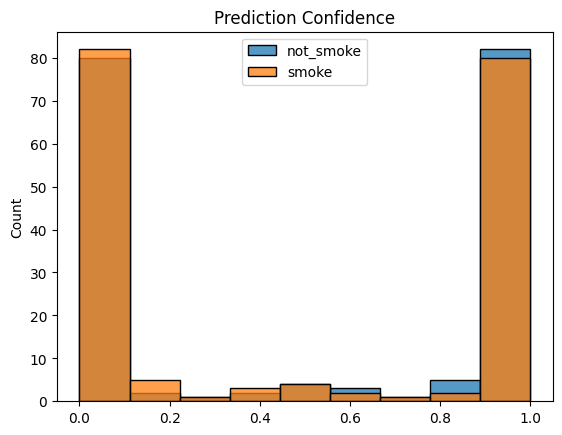

Total Missclassification for smoking:  7  from total  10  data
Total Missclassification for Not Smoking:  3 from total   10  data


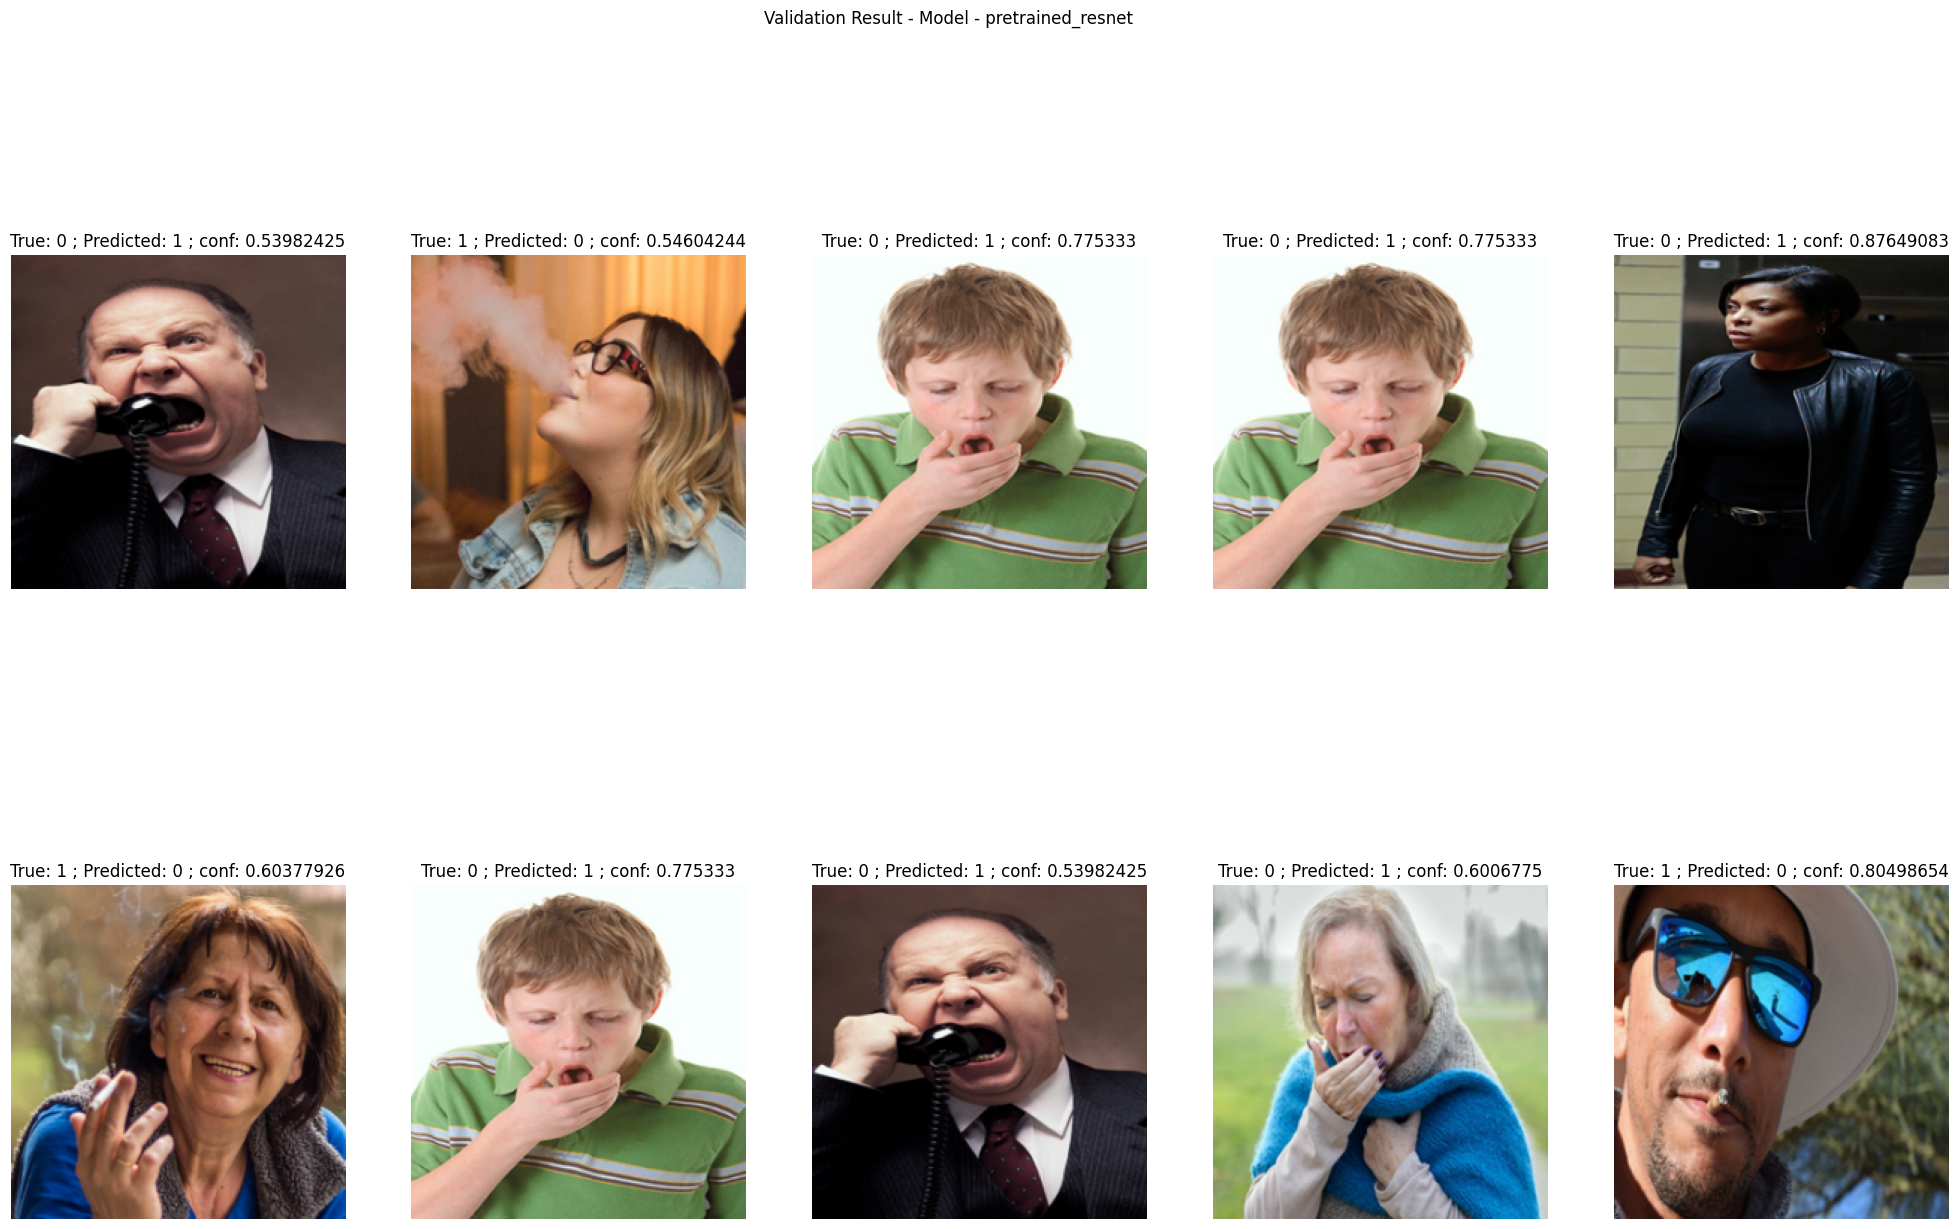

In [11]:
import importlib
importlib.reload(eau)
eau.runAlgorithm(config, vit_best,
                 ModelName.pretrained_resnet,
                 valid_loader,device="cpu")

Result for : $pretrained_resnet
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       112
         1.0       0.91      0.98      0.94       112

    accuracy                           0.94       224
   macro avg       0.94      0.94      0.94       224
weighted avg       0.94      0.94      0.94       224



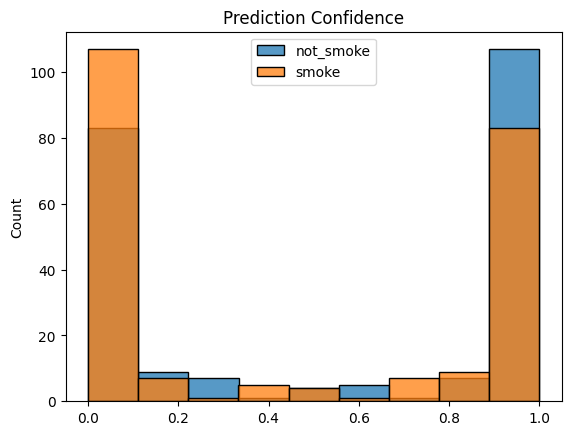

Total Missclassification for smoking:  11  from total  13  data
Total Missclassification for Not Smoking:  2 from total   13  data


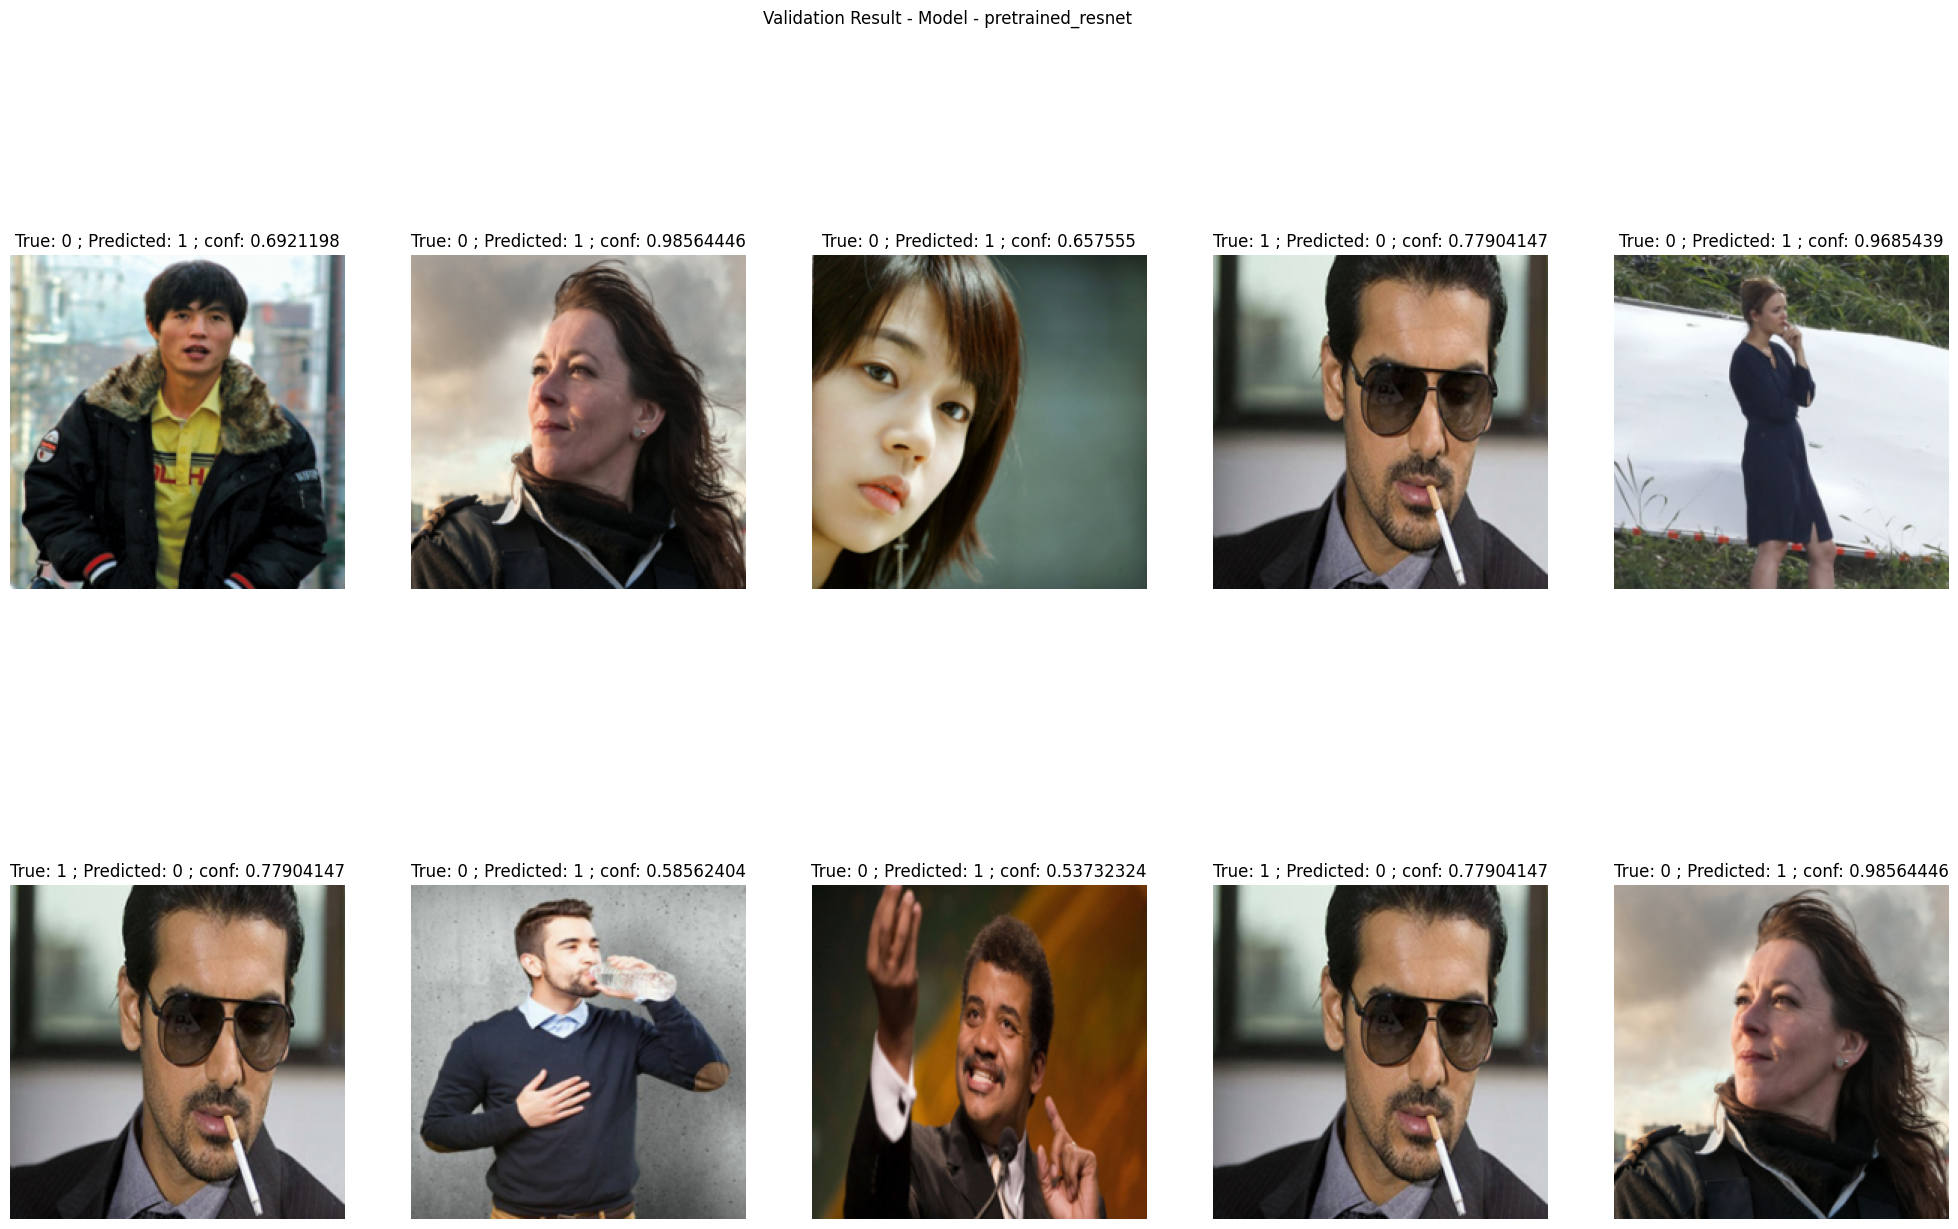

In [12]:
import importlib
importlib.reload(eau)
eau.runAlgorithm(config, vit_best,
                 ModelName.pretrained_resnet,
                 test_loader,device="cuda")